# DT Regression

# DECISION TREE CLASSIFIER

In [2]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus


#reads file and determines wich one is the header and index column
dataset = pd.read_csv("Base.csv", index_col=0, header=0, sep=',', encoding='latin-1')

#determines wich part of dataset we will work with, in this case columns 2 to 14
dataset = dataset.iloc[:, 0:18
                      ]
#calculates basic statistic information about dataset
dataset.head(2)

,Gender,Age,Scholarity,State_residence,City_residence,main_transport,TP_grade,TP_evaluation,ridehailing_use,Traffic_TP_quality,Traffic_influence,Perception_RH_congestion,RH_congestion,Agree_or_not,Acceptability,Fund_PT,Fund_auto
ï»¿ID,,,,,,,,,,,,,,,,,
20210001,Feminino,Entre 30 e 34 anos,Ensino Superior completo,Mato Grosso,Cuiaba,Individual,4,Neutral,Mensalmente,6,Agree,5,Agree,7,Agree,7,1
20210002,Feminino,Entre 25 e 29 anos,Ensino Superior completo,Mato Grosso do Sul,Campo Grande,Individual,4,Neutral,Semanalmente,7,Agree,6,Agree,6,Agree,7,3


In [3]:
#pd.factorize transforms a value into a numeric representation, each value receives a unique correspondent

dataset['Acceptability'], class_names = pd.factorize(dataset['Acceptability'])
dataset['Gender'],gender = pd.factorize(dataset['Gender'])
dataset['ridehailing_use'],ridehailing_use = pd.factorize(dataset['ridehailing_use'])
dataset['Age'],age = pd.factorize(dataset['Age'])
dataset['main_transport'],main_transport = pd.factorize(dataset['main_transport'])
dataset['TP_evaluation'],TP_evaluation = pd.factorize(dataset['TP_evaluation'])
dataset['Scholarity'],scholarity = pd.factorize(dataset['Scholarity'])
dataset['Traffic_influence'],Traffic_influence = pd.factorize(dataset['Traffic_influence'])
dataset['RH_congestion'],RH_congestion = pd.factorize(dataset['RH_congestion'])

In [4]:
#setting dependent variable
y = dataset.iloc[:, 14].values

In [5]:
#Removing columns that I don't want in my dataframe
#determinando quais as variáveis independentes
X = dataset.drop(columns=["State_residence","City_residence","TP_grade","Traffic_TP_quality","Perception_RH_congestion","Agree_or_not","Acceptability","Fund_PT","Fund_auto"]).values
features_names = list(dataset.drop(columns=["State_residence","City_residence","TP_grade","Traffic_TP_quality","Perception_RH_congestion","Agree_or_not","Acceptability","Fund_PT","Fund_auto"]).columns)

In [6]:
#K-FOLD

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function

Fold:1, Train set: 486, Test set:122
Fold:2, Train set: 486, Test set:122
Fold:3, Train set: 486, Test set:122
Fold:4, Train set: 487, Test set:121
Fold:5, Train set: 487, Test set:121


In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [8]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [9]:
score = cross_val_score(dtree, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.96721311 0.98360656 0.99180328 0.95867769 0.95867769]
Average score: 0.97


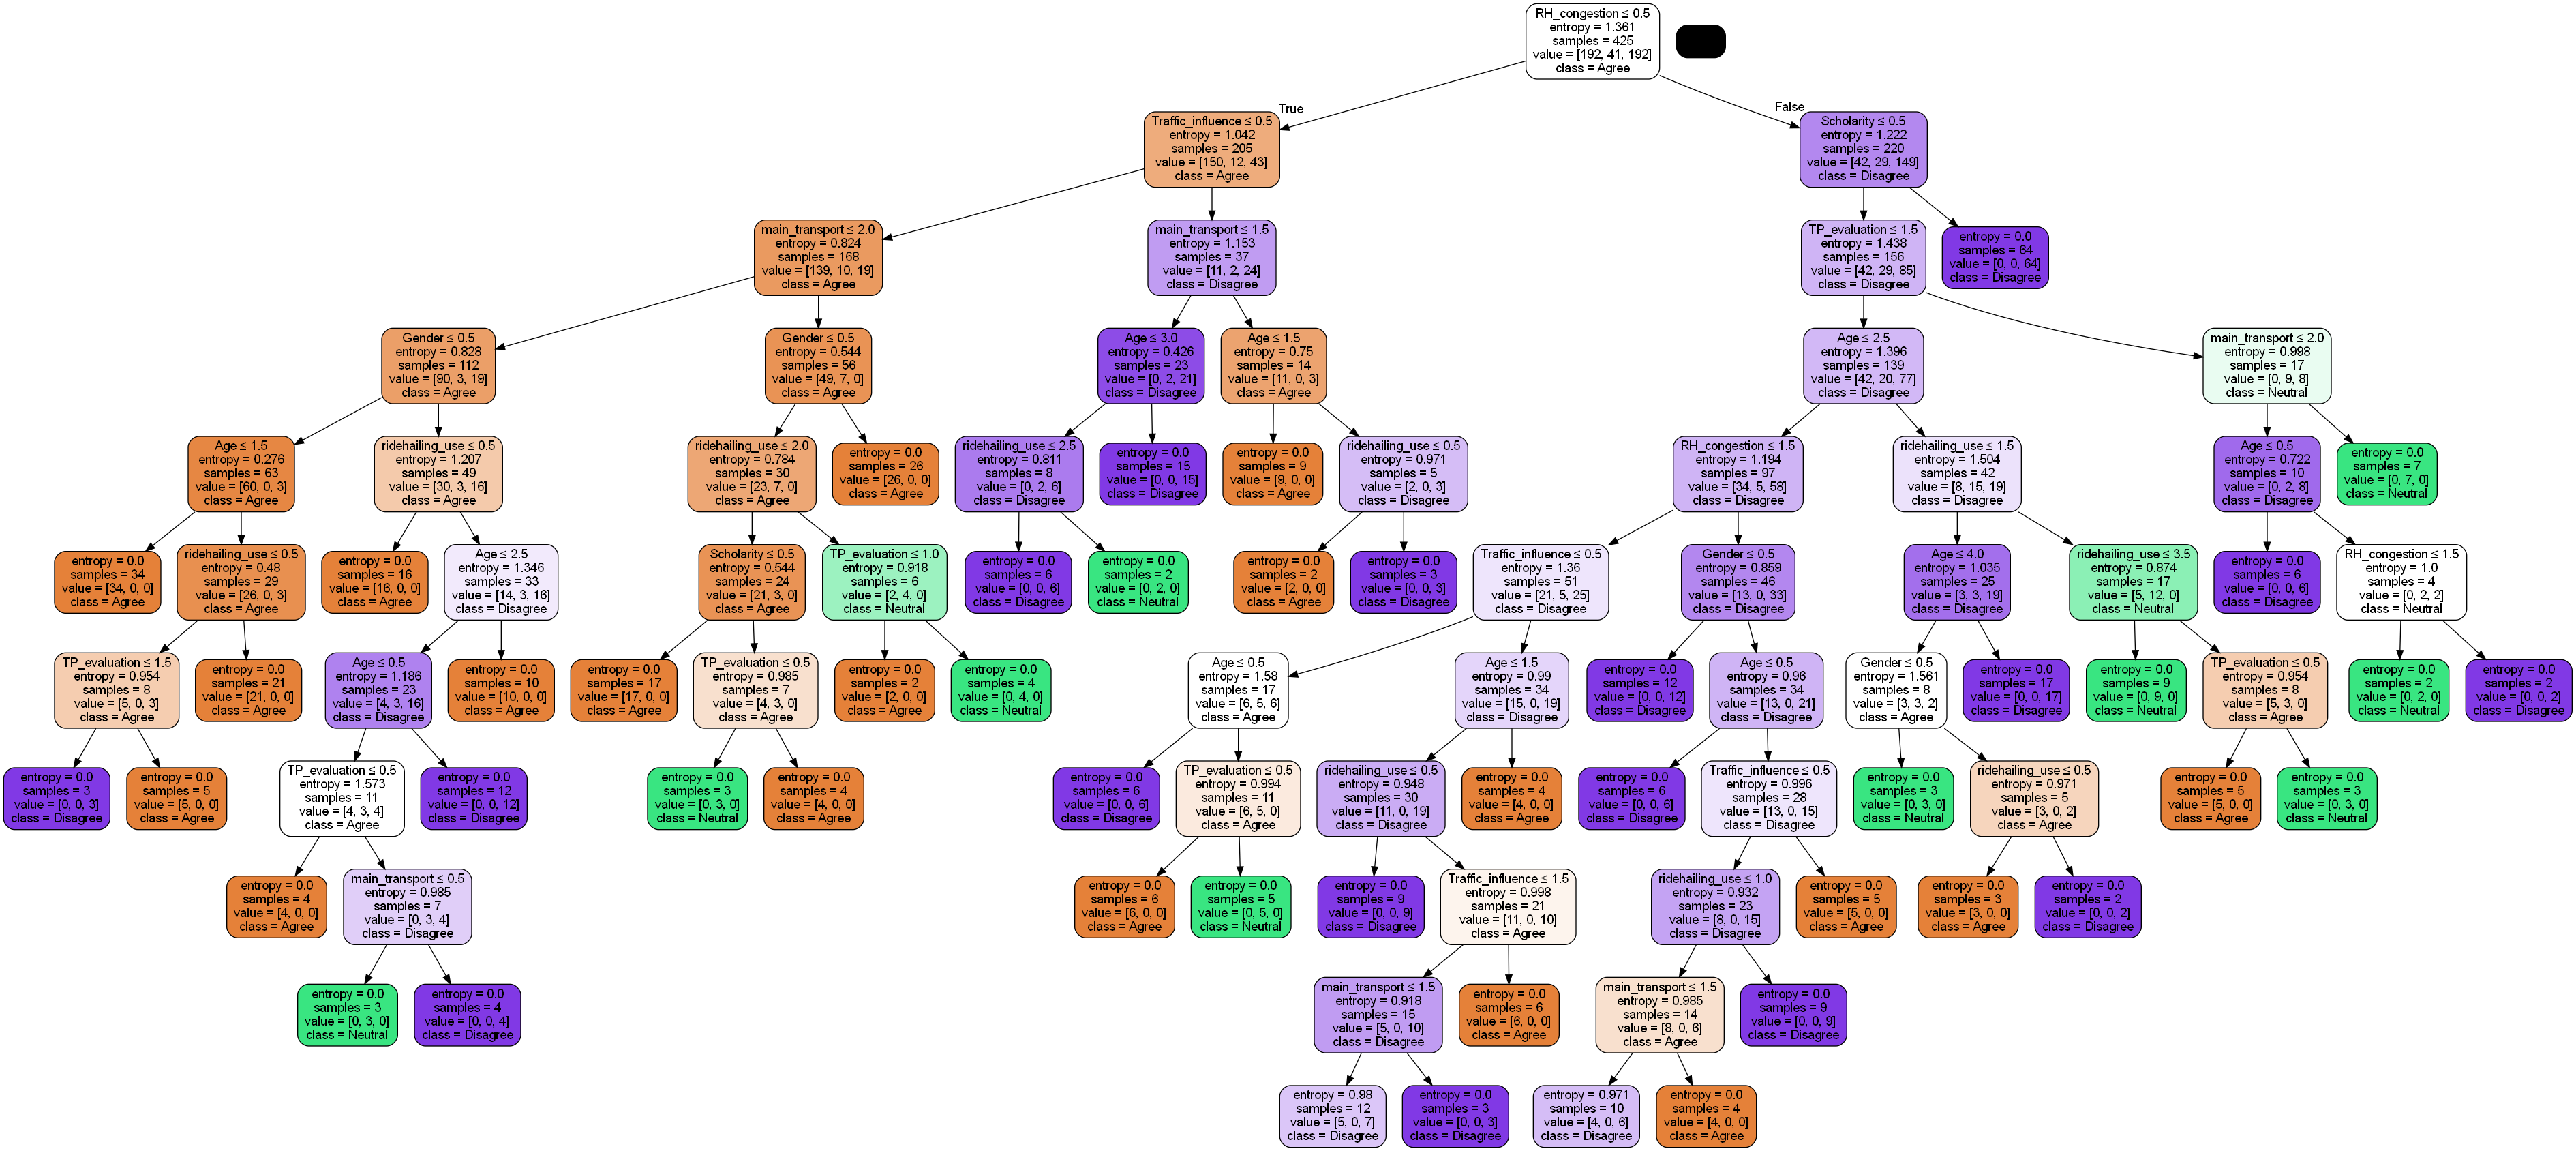

In [10]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                feature_names=features_names, class_names=class_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
feature_names = list(dataset.drop(columns=["State_residence","City_residence","TP_grade","Traffic_TP_quality","Perception_RH_congestion","Agree_or_not","Acceptability","Fund_PT","Fund_auto"]).columns)
feature_imp = pd.Series(dtree.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

RH_congestion        0.192085
Age                  0.174291
ridehailing_use      0.156112
TP_evaluation        0.111923
main_transport       0.108444
Traffic_influence    0.098732
Scholarity           0.090956
Gender               0.067457
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


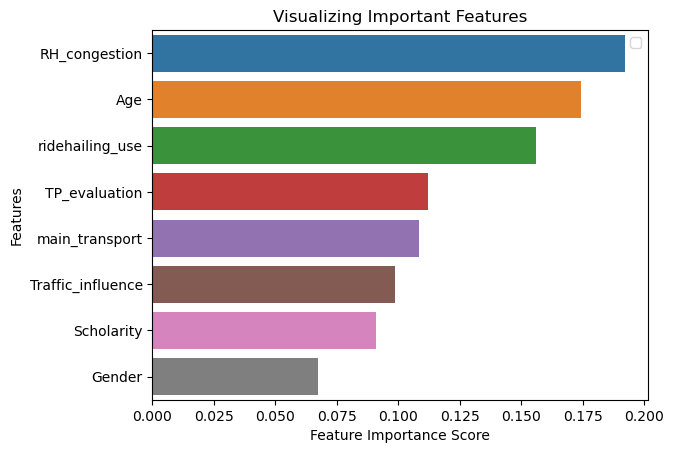

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [15]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[78  0  2]
 [ 5 21  0]
 [ 2  1 74]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        80
           1       0.95      0.81      0.88        26
           2       0.97      0.96      0.97        77

    accuracy                           0.95       183
   macro avg       0.95      0.91      0.93       183
weighted avg       0.95      0.95      0.94       183



# Prunnig

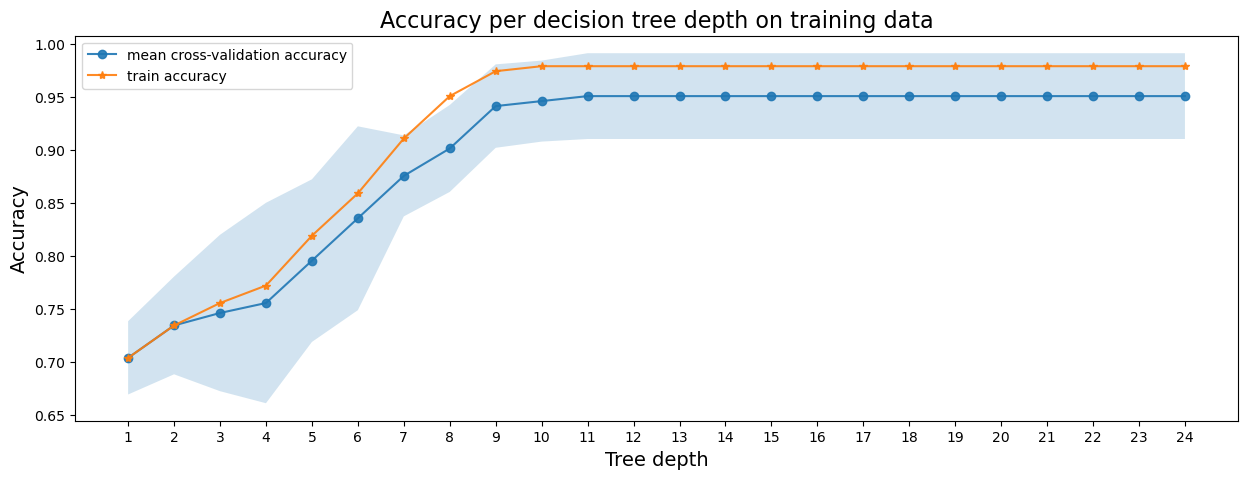

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [17]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-11 tree achieves the best mean cross-validation accuracy 95.05882 +/- 2.02408% on training dataset


In [18]:
# function for training and evaluating a tree
model = DecisionTreeClassifier(criterion='entropy',max_depth=sm_best_tree_depth, random_state=42)
model.fit(X_train, y_train)
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
print('Single tree depth: ', sm_best_tree_depth)
print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')

Single tree depth:  11
Accuracy, Training Set:  97.88235 %
Accuracy, Test Set:  94.53552 %


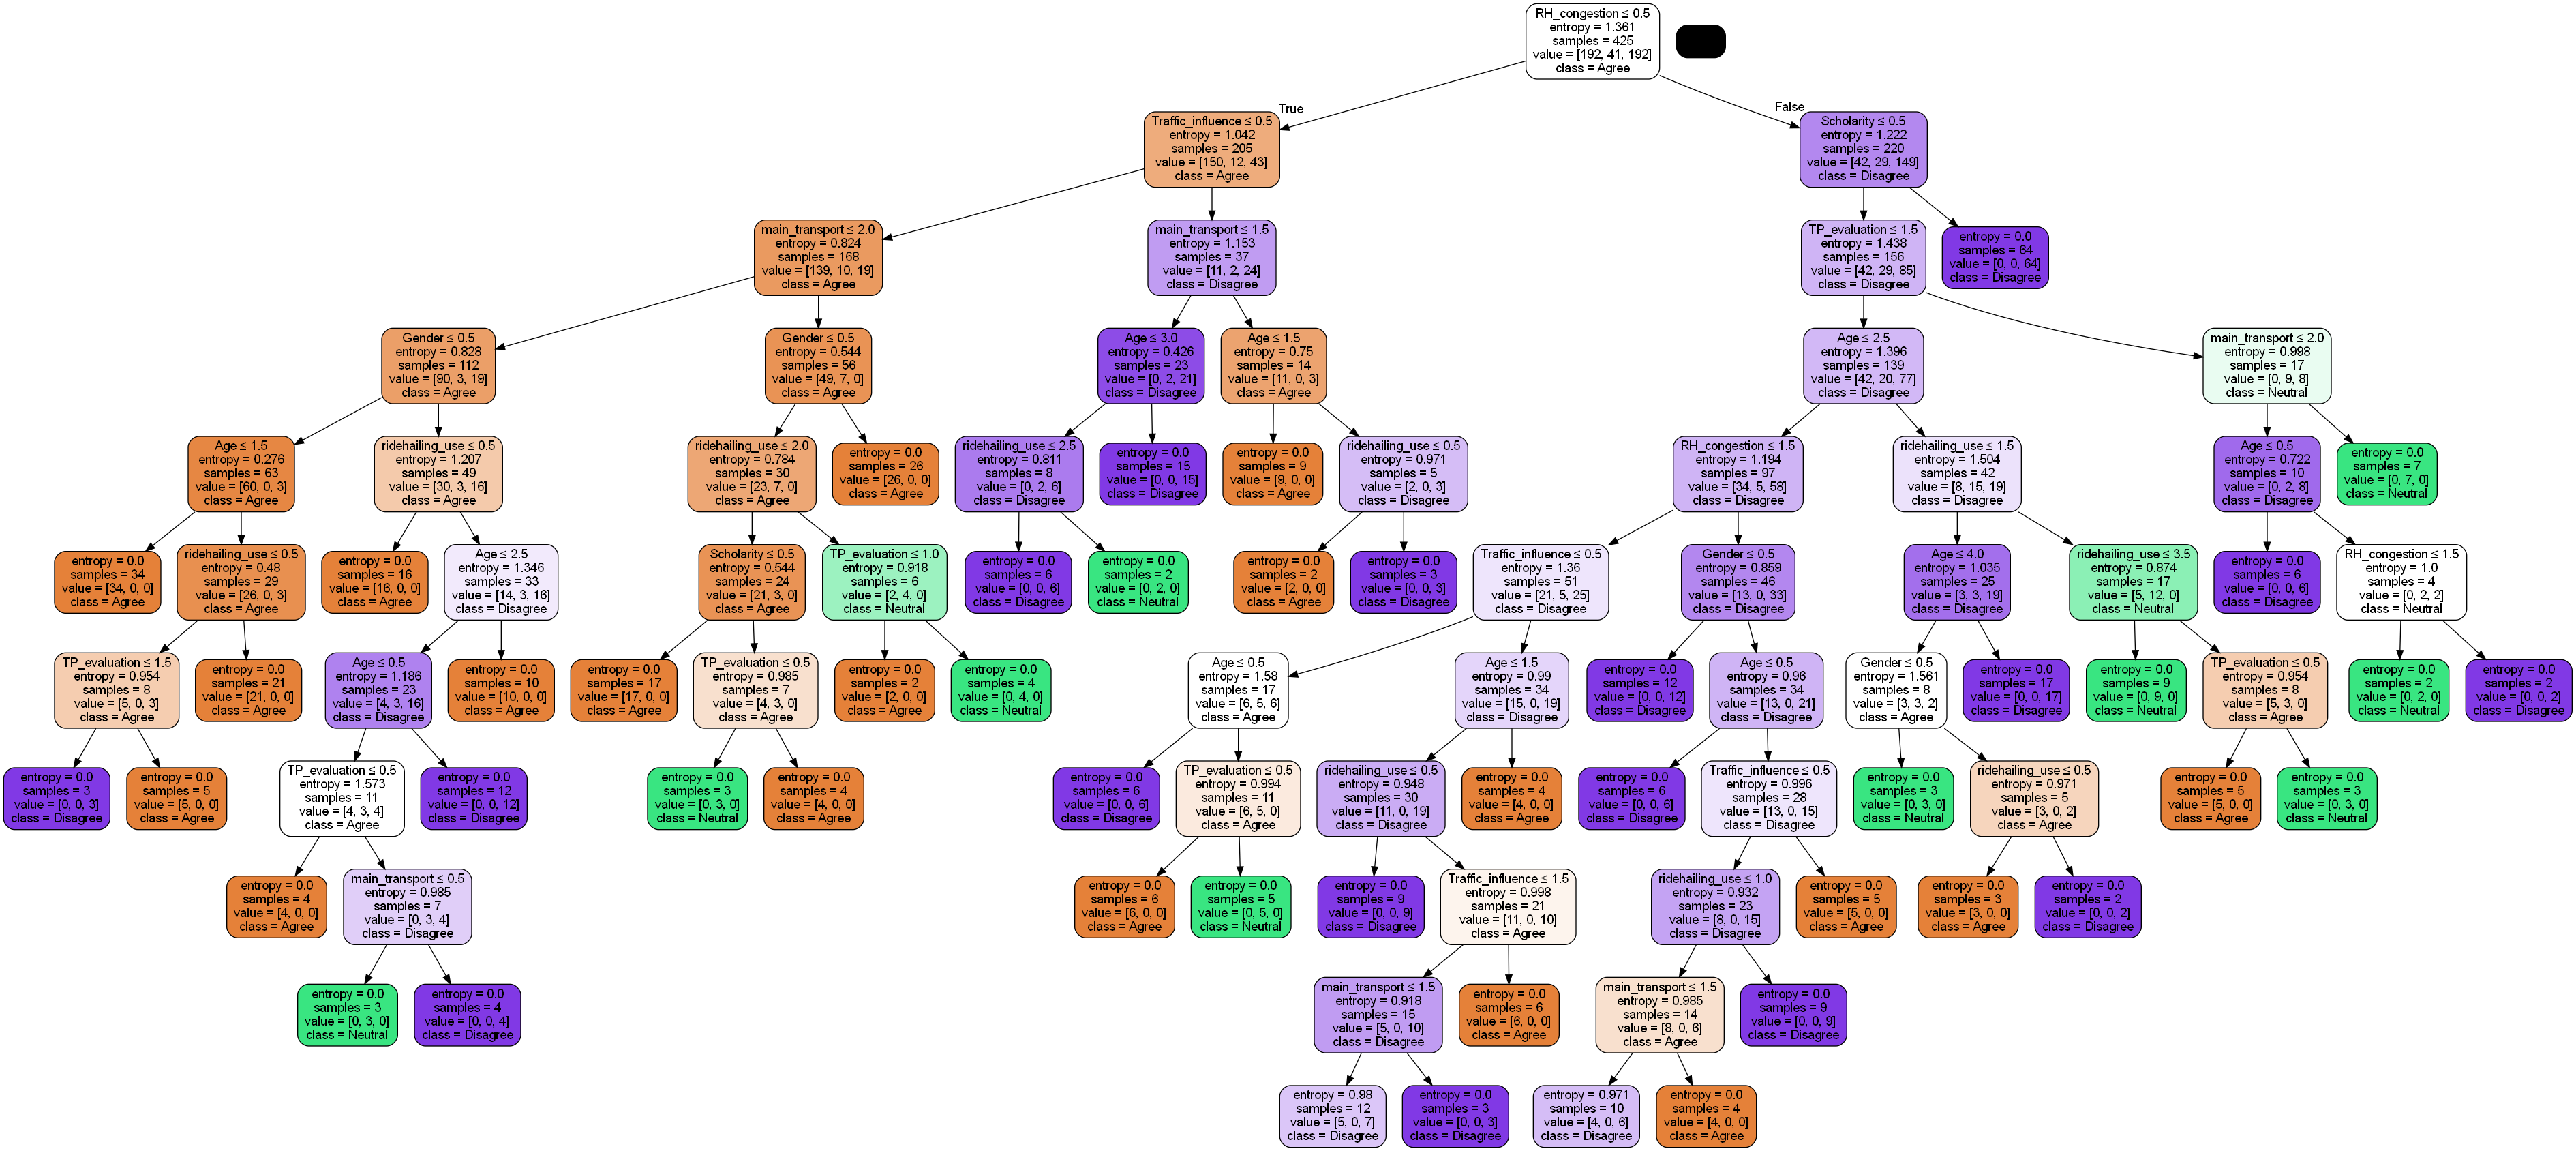

In [19]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                feature_names=features_names, class_names=class_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [21]:
feature_names = list(dataset.drop(columns=["State_residence","City_residence","TP_grade","Traffic_TP_quality","Perception_RH_congestion","Agree_or_not","Acceptability","Fund_PT","Fund_auto"]).columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

RH_congestion        0.192085
Age                  0.174291
ridehailing_use      0.156112
TP_evaluation        0.111923
main_transport       0.108444
Traffic_influence    0.098732
Scholarity           0.090956
Gender               0.067457
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


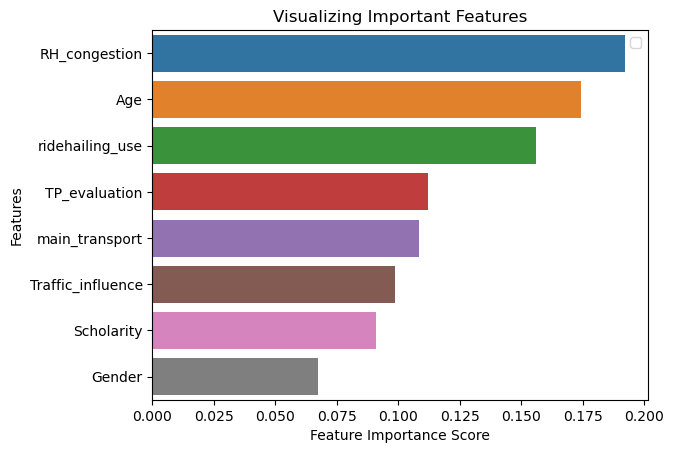

In [22]:
y = dataset.iloc[:, 14].values
X = dataset.drop(columns=["State_residence","City_residence","TP_grade","Traffic_TP_quality","Perception_RH_congestion","Agree_or_not","Acceptability","Fund_PT","Fund_auto"]).values
features_names = list(dataset.drop(columns=["State_residence","City_residence","TP_grade","Traffic_TP_quality","Perception_RH_congestion","Agree_or_not","Acceptability","Fund_PT","Fund_auto"]).columns)
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()